#### LICENSE
These notes are released under the 
"Creative Commons Attribution-ShareAlike 4.0 International" license. 
See the **human-readable version** [here](https://creativecommons.org/licenses/by-sa/4.0/)
and the **real thing** [here](https://creativecommons.org/licenses/by-sa/4.0/legalcode). 

## Lecture slides 

The lecture slides are [here](STAT406-17-lecture-1.pdf). 

## Predictions using a linear model

In this document we will explore (rather superficially)
some difficulties found when trying to estimate the forecasting 
properties (e.g. the mean squared prediction 
error) of a (linear) predictor. We will
use the air-pollution data set, which
has been split into a training
set and a test set. 

If you are interested in how these sets were 
constructed, I ran the following script (you
do not need to do this, as I am providing both
of them to you, but you can if you want to):

In [2]:
x <- read.csv('rutgers-lib-30861_CSV-1.csv')
set.seed(123)
ii <- sample(rep(1:4, each=15))
# this is the training set `pollution-train.dat`
x.tr <- x[ii != 2, ]
# this is the test set `pollution-test.dat`
x.te <- x[ii == 2, ]
# then I saved them to disk:
# write.csv(x.tr, file='pollution-train.dat', row.names=FALSE, quote=FALSE)
# write.csv(x.te, file='pollution-test.dat', row.names=FALSE, quote=FALSE)


We now read the **training** data set from the file `pollution-train.dat`,
which is 
available [here](pollution-train.dat), and check 
that it was read properly:

In [3]:
x.tr <- read.table('pollution-train.dat', header=TRUE, sep=',')
# sanity check
head(x.tr)

PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO.,HUMID,MORT
35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.875
47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289
53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1030.380
45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,899.529
36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1001.902


The response variable is `MORT`. 
Our first step is to fit a 
linear regression model with all available
predictors and look at a few diagnostic plots
where everything looks fine:

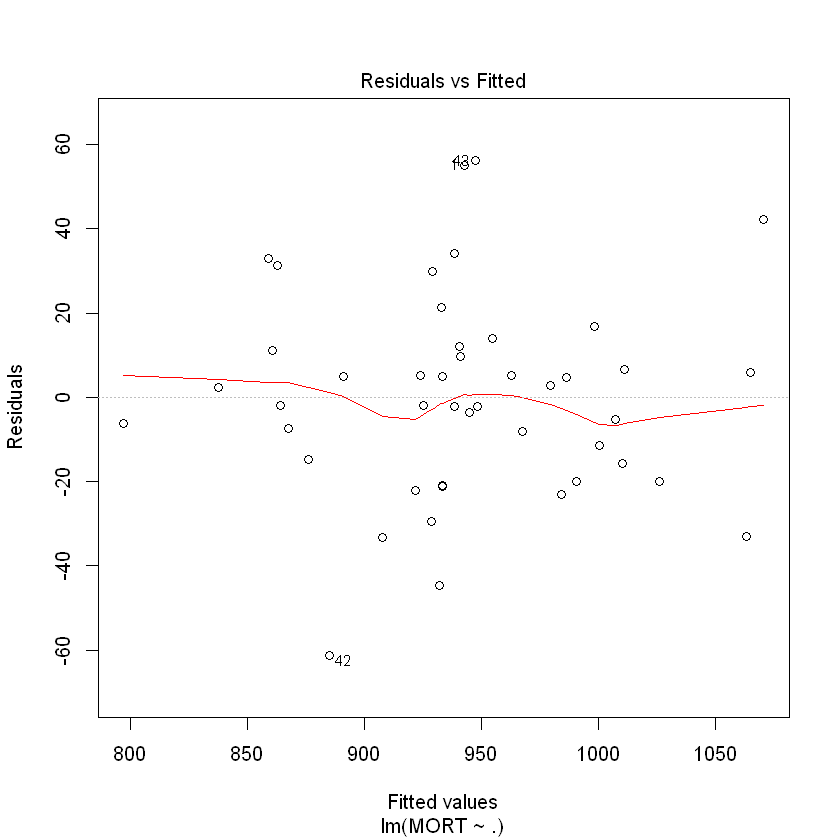

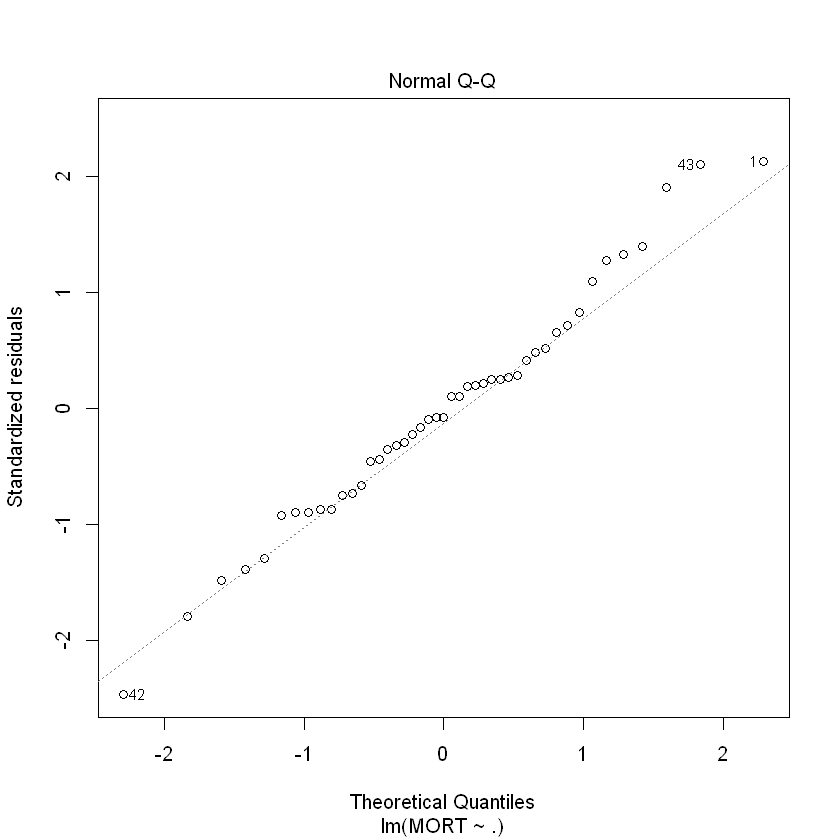

In [4]:
full <- lm(MORT ~ . , data=x.tr)
plot(full, which=1)
plot(full, which=2)

We also take a look at the estimated coeficients: 

In [5]:
summary(full)


Call:
lm(formula = MORT ~ ., data = x.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.147 -15.644  -2.018  11.162  56.094 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.243e+03  4.665e+02   4.809 4.31e-05 ***
PREC         1.952e+00  9.417e-01   2.073 0.047168 *  
JANT        -1.366e+00  1.171e+00  -1.166 0.253036    
JULT        -3.696e+00  2.014e+00  -1.835 0.076856 .  
OVR65       -2.054e+01  9.144e+00  -2.247 0.032451 *  
POPN        -1.030e+02  7.315e+01  -1.409 0.169574    
EDUC        -5.627e+01  1.402e+01  -4.014 0.000386 ***
HOUS        -2.086e+00  1.830e+00  -1.140 0.263643    
DENS         1.297e-02  4.931e-03   2.630 0.013537 *  
NONW         2.212e+00  1.570e+00   1.409 0.169494    
WWDRK        3.473e+00  1.752e+00   1.982 0.056983 .  
POOR        -2.248e+00  3.288e+00  -0.684 0.499547    
HC          -1.379e+00  6.268e-01  -2.200 0.035949 *  
NOX          3.014e+00  1.321e+00   2.281 0.030064 *  
SO.         -3.021e-01 